# APIs and Data Fetching

## Overview

In this lab, you'll practice:
- Understanding APIs and HTTP requests
- Making GET and POST requests
- Working with JSON data
- Using financial APIs (yfinance, Alpha Vantage)
- Fetching real-time market data
- Web scraping with Pandas
- Sentiment analysis on financial news

## What is an API?

**API (Application Programming Interface)** is a way for programs to communicate with each other. In finance, APIs let us:
- Fetch real-time stock prices
- Download historical market data
- Access company financials
- Get economic indicators
- Retrieve news and sentiment

### HTTP Methods:
- **GET**: Retrieve data (most common)
- **POST**: Send data to server
- **PUT**: Update existing data
- **DELETE**: Remove data

### Common Response Formats:
- **JSON**: JavaScript Object Notation (most common)
- **XML**: Extensible Markup Language
- **CSV**: Comma-Separated Values

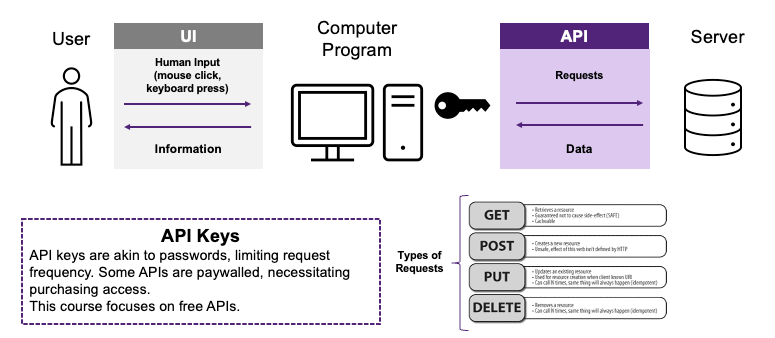

## Making Your First API Request

Open Meteo provides free weather data without requiring an API key.

In [3]:
import requests
import pandas as pd

# Coordinates for Sydney
latitude = -33.891228
longitude = 151.19585

# Construct API URL
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m'

# Make request
response = requests.get(url)
data = response.json()

# Extract current weather
current_weather = data['current_weather']
print(f'Weather information at {latitude},{longitude}')
print()

# Display as DataFrame
weather_df = pd.DataFrame.from_dict(current_weather, orient='index', columns=['values'])
print(weather_df)

Weather information at -33.891228,151.19585

                         values
time           2026-01-22T06:15
interval                    900
temperature                21.7
windspeed                  23.8
winddirection               155
is_day                        1
weathercode                   3


### Interactive Weather Query

In [4]:
def get_weather(latitude, longitude):
    """
    Fetch current weather for given coordinates.
    """
    url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true'
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise error for bad status codes
        
        data = response.json()
        weather = data['current_weather']
        
        print(f"Temperature: {weather['temperature']}°C")
        print(f"Wind Speed: {weather['windspeed']} km/h")
        print(f"Weather Code: {weather['weathercode']}")
        
        return weather
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather: {e}")
        return None

# Test with New York coordinates
weather = get_weather(40.7128, -74.0060)

Temperature: 1.1°C
Wind Speed: 7.2 km/h
Weather Code: 3


## Part 3: Financial Data with yfinance

yfinance is a popular library for downloading financial data from Yahoo Finance.

### Installation

If you haven't installed yfinance yet:
```bash
pip install yfinance --break-system-packages
```

### Downloading Stock Data

In [11]:
import yfinance as yf
import pandas as pd

# Download historical data for Microsoft
bhp = yf.download(
    tickers='BHP.AX',
    start='2024-01-01',
    end='2024-12-31',
    progress=False
)

print("BHP Stock Data:")
print(bhp.head())
print(f"\nShape: {msft.shape}")

BHP Stock Data:
Price           Close       High        Low       Open   Volume
Ticker         BHP.AX     BHP.AX     BHP.AX     BHP.AX   BHP.AX
Date                                                           
2024-01-02  45.921501  45.980560  45.521707  45.548968  3375905
2024-01-03  45.221867  45.648918  45.176436  45.612572  4483073
2024-01-04  45.049232  45.558056  45.049232  45.558056  4458375
2024-01-05  44.585831  45.049227  44.540401  44.885676  3992737
2024-01-08  44.213303  44.744843  44.086097  44.631266  3513478

Shape: (253, 6)


### Getting Company Information

In [12]:
# Get detailed company information
ticker = yf.Ticker('AAPL')

# Company info
info = ticker.info
print(f"Company: {info.get('longName', 'N/A')}")
print(f"Sector: {info.get('sector', 'N/A')}")
print(f"Industry: {info.get('industry', 'N/A')}")
print(f"Market Cap: ${info.get('marketCap', 0):,.0f}")
print(f"P/E Ratio: {info.get('trailingPE', 'N/A')}")
print(f"52 Week High: ${info.get('fiftyTwoWeekHigh', 0):.2f}")
print(f"52 Week Low: ${info.get('fiftyTwoWeekLow', 0):.2f}")

Company: Apple Inc.
Sector: Technology
Industry: Consumer Electronics
Market Cap: $3,659,363,778,560
P/E Ratio: 33.24161
52 Week High: $288.62
52 Week Low: $169.21
